In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import spacy
from tqdm import tqdm


# Imports cleaned tweets data

In [2]:
df_tickers_dow = pd.read_csv("data/tickers_dow.csv")
df_tickers_sp_100 = pd.read_csv("data/tickers_sp_100.csv")

df_tickers = pd.concat([df_tickers_dow, df_tickers_sp_100])

id2ticker = dict(zip(df_tickers.user_id, df_tickers.ticker))

In [3]:
df_tweets = pd.read_csv('data/tweets_dow.csv', parse_dates=['created_at'], dtype={'id':'Int64', 'text':'string', 'author_id':'Int64'})

df_tweets.rename(columns={'created_at':'time'}, inplace=True)
df_tweets['ticker'] = df_tweets['author_id'].map(id2ticker)
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186204 entries, 0 to 186203
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   id         186204 non-null  Int64              
 1   author_id  186204 non-null  Int64              
 2   text       186204 non-null  string             
 3   time       186204 non-null  datetime64[ns, UTC]
 4   ticker     186204 non-null  object             
dtypes: Int64(2), datetime64[ns, UTC](1), object(1), string(1)
memory usage: 7.5+ MB


In [4]:
df_tweets.head()

,id,author_id,text,time,ticker
0,1530202298017890306,21021891,We're excited to announce we have sanctioned t...,2022-05-27 15:00:32+00:00,CVX
1,1530201208312438790,21021891,Chevron's US Permian Basin operation sites are...,2022-05-27 14:56:12+00:00,CVX
2,1529833838020644864,21021891,We have identified nearly 100 GHG abatement pr...,2022-05-26 14:36:24+00:00,CVX
3,1529537844171227136,21021891,We’ve identified nearly 100 GHG-abatement proj...,2022-05-25 19:00:14+00:00,CVX
4,1527752758337540096,21021891,RT @ftlive: Decarbonising an industry in recov...,2022-05-20 20:46:56+00:00,CVX


In [5]:
# number of tweets by firm

df_tweets.groupby('ticker').count().id.sort_values()

ticker
HON      1688
BA       1725
CVX      2266
MCD      2671
UNH      2673
NKE      2741
WBA      2876
MMM      3000
HD       4144
WMT      4518
KO       4547
MA       4742
MRK      4872
INTC     4898
DOW      4967
AXP      6052
JNJ      6128
JPM      6390
TRV      6518
CAT      6593
PG       6847
AMGN     8038
IBM      8350
AAPL     9005
CSCO     9406
MSFT     9456
DIS     10151
T       11314
GS      14376
CRM     15252
Name: id, dtype: int64

# Classify tweets from trained model

- Add column `pred_score` to `df_tweets`

In [6]:
nlp = spacy.load("./output/model-best")

In [7]:
data = tuple(zip(df_tweets.text.tolist(), df_tweets.index))

In [8]:
pred_score = np.zeros(len(df_tweets))

for doc, i in tqdm(nlp.pipe(data, as_tuples=True), total=len(df_tweets)):
    pred_score[i] = doc.cats['climate_related']

df_tweets['pred_score'] = pred_score

100%|██████████| 186204/186204 [00:31<00:00, 5867.61it/s]


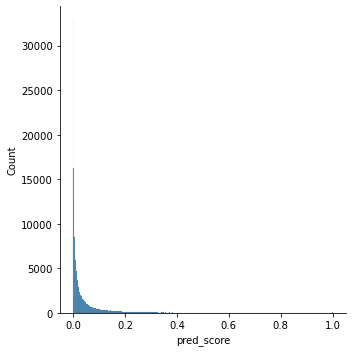

In [9]:
# pred_score pooled from all twitter accounts

sns.displot(df_tweets.pred_score)

In [10]:
# show a snippet of tweets within percentile of pred_score

pd.options.display.max_colwidth = 300

percentile = 0.5

print(len(df_tweets[['pred_score', 'text']][df_tweets.pred_score > percentile]))
df_tweets[['pred_score', 'text']][(df_tweets.pred_score > percentile) & (df_tweets.pred_score < percentile + 0.1)].sample(20).sort_values('pred_score')

4246


,pred_score,text
8314,0.500224,time for a little S A U C E https://t.co/1qnqkuCPYJ #TheSaweetieMeal https://t.co/Q8l554fGBW
116895,0.501080,.@DowPackaging @Jill_Martin77 &amp; @zhanghants join a #GEFlive Twitter chat tomorrow on post-harvest food loss https://t.co/8ETuQOqZjf #Dow2025 https://t.co/EIqTtwgujL
51041,0.521162,RT @SBNation: Rory McIlroy made this elderly fan’s day at the #TravelersChampionship &lt;3 &lt;3 &lt;3 https://t.co/d7DA8EKSuN
123880,0.524587,"Business development changed a LOT in 2020. Architecture, engineering, &amp; construction (AEC) firms are no exception. Learn how the industry is improving business development and other processes through digital transformation: https://t.co/adkpBXJ3ab"
4897,0.529975,RT @Jumpman23: Not playin'. DJ Khaled unboxes his new Anti-Gravity Machines. #AJXXXI 👻: djkhaled305 https://t.co/DxUbHKURB0
75641,0.534805,Eating at least 5 servings of fruits and vegetables a day and limiting your salt intake can help to prevent #heartattack and #stroke. #HeartMonth #loveyourheart https://t.co/wh2mZYp0nK
178126,0.535380,RT @tristanwalker: How I Built This. (Much love to @guyraz and the @HowIBuiltThis @NPR team!) https://t.co/PSGUbJCDmh
120630,0.538714,"Less commuters are on the road, more remote workers are staying home. So, what does that mean for our carbon footprint? 👣 @Reuters digs into how we’re tracking emissions from our home offices: https://t.co/hu5JKFbAlh https://t.co/QEXGhiOSFD"
94799,0.544060,RT @markmcmorris: Last night was insane! Thanks for all of the support. #intel #xgames https://t.co/9pzb2yyhMe
147203,0.544793,Mary Kay is leading the charge to develop the next wave of global beauty products.


In [11]:
def esg_score(pred_scores, slope = 60, threshold = 0.5):
    '''
    aggragate score by applying sigmoid, then take mean
    input: np.array of pred_score
    output: scaler
    '''
    return np.mean(1 / (1 + np.exp(-slope * (pred_scores - threshold))), axis=0)

In [12]:
df = df_tweets.pivot(index=['id', 'time'], columns='ticker',values='pred_score')

# after pivot, df contain lots of NaN, which will be excluded after aggregate

df = df.groupby(pd.Grouper(freq='M', level='time')).aggregate(esg_score, threshold = 0.52)


In [13]:
df.isnull().sum().sort_values(ascending=False).head()

ticker
AAPL    8
NKE     6
KO      2
MCD     1
AMGN    0
dtype: int64

In [14]:
df.mean().sort_values().head(10)

ticker
AAPL    0.001676
KO      0.004602
NKE     0.005759
DIS     0.008264
MA      0.009046
AXP     0.010817
T       0.011333
JNJ     0.012585
INTC    0.012725
WBA     0.013623
dtype: float64

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

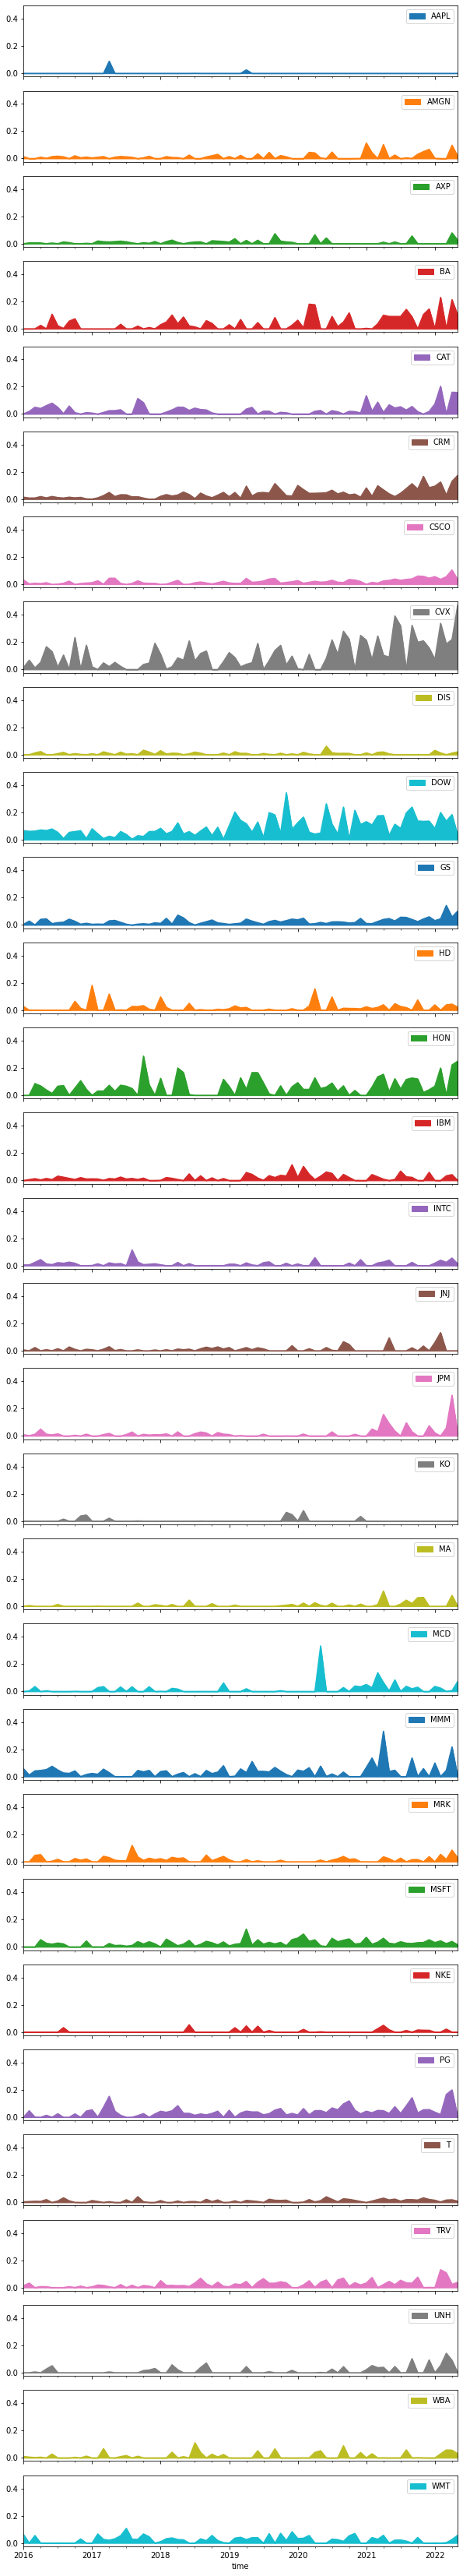

In [25]:
df.plot.area(subplots=True, figsize=(10, 60), sharey=True)

In [26]:
df.to_csv('climate_score.csv')